# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Jarrod Sims

### GitHub Repo: https://github.com/simsjarrod/44620_mod6

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

### Question 1
Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [171]:
import requests
import pickle
import spacy
from bs4 import BeautifulSoup
parser = 'html.parser'

article_page = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')
html_content = article_page.text
soup = BeautifulSoup(html_content, "html.parser")
article = soup.find("article")

with open ("article_element.pkl", "wb") as file:
    pickle.dump(str(article),file)
    print('Article printed to pickle')



Article printed to pickle


### Question 2
Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [172]:
with open("article_element.pkl", "rb") as file:
    html_text = pickle.load(file)

soup = BeautifulSoup(html_text, "html.parser")
text = soup.get_text()


def remove_empty_lines(text):
    lines = text.split("\n")
    non_empty_lines = [line.strip() for line in lines if line.strip()]
    return "\n".join(non_empty_lines)

cleaned_text = remove_empty_lines(text)
print(cleaned_text)

How Laser Headlights Work
130 Comments
by:
Lewin Day
March 22, 2021
When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!
Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside of a very specific spot quite some distance aw

### Question 3
Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [173]:
import spacy 

nlp = spacy.load('en_core_web_sm')
doc = nlp(cleaned_text)

non_ws_tokens = []
for token in doc:
    if not token.is_space:
        non_ws_tokens.append(token)
#print(non_ws_tokens)

def we_care_about(token):
    return not (token.is_space or token.is_punct)

interesting_tokens = [token for token in doc if we_care_about(token)]
#print(interesting_tokens)

from collections import Counter
def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

interesting_tokens = [token for token in doc if we_care_about(token)]
word_freq = Counter(map(str,interesting_tokens))
print(f"The most common words are: {word_freq.most_common(5)}")

The most common words are: [('laser', 29), ('headlights', 17), ('technology', 10), ('headlight', 10), ('LED', 10)]


### Question 4
Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [174]:
interesting_lemmas = [token.lemma_ for token in doc if we_care_about(token)]
lemma_freq = Counter(interesting_lemmas)

def print_word_frequencies(common_words):
    print("Five Most Common Words:")
    print("-----------------")
    for word, frequency in common_words:
        print(f"{word}: {frequency}")

common_words = lemma_freq.most_common(5)

print_word_frequencies(common_words)


Five Most Common Words:
-----------------
laser: 35
headlight: 27
beam: 12
technology: 10
light: 10


### Question 5
Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [175]:
import spacy
import string
from collections import Counter

sentence = "When we think about the onward march of automotive technology, headlights aren't usually the first thing that come to mind."

def remove_stopwords_and_punctuations(tokens):
    return [token.lemma_.lower() for token in tokens if not token.is_stop and token.is_alpha]

def score_sentence_by_token(sentence, interesting_tokens):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(sentence)
    clean_tokens = remove_stopwords_and_punctuations(doc)
    interesting_token_count = sum(1 for token in clean_tokens if token in interesting_tokens)
    score = interesting_token_count / len(clean_tokens)
    return score
    
def score_sentence_by_lemma(sentence, interesting_lemmas):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(sentence)
    clean_lemmas = remove_stopwords_and_punctuations(doc)
    interesting_lemma_count = sum(1 for lemma in clean_lemmas if lemma in interesting_lemmas)
    score = interesting_lemma_count / len(clean_lemmas)
    return score

common_tokens = ['laser','headlight','beam','technology','light']
common_lemmas = ['laser','headlight','beam','technology','Light']

print(f"Interesting token score equals {score_sentence_by_token(sentence, common_tokens)}")
print(f"Interesting lemma score equals {score_sentence_by_lemma(sentence, common_lemmas)}")


Interesting token score equals 0.2
Interesting lemma score equals 0.2


### Question 6
Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

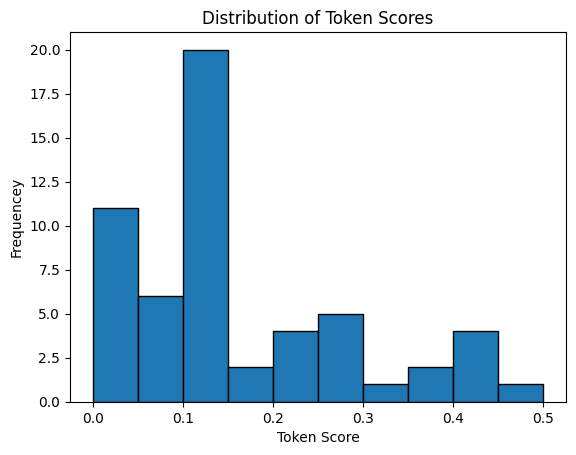

In [182]:
import spacy
import pickle
import matplotlib.pyplot as plt

def extract_sentences(text):
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(text)
    sentences = [sent.text for sent in doc.sents]

    return sentences

if __name__ == "__main__":
    input_filename = "article_element.pkl"
    with open(input_filename, "rb") as f:
        article_html = pickle.load(f)

    article_element = soup.find('article')

    article_text = article_element.get_text()
    sentences = extract_sentences(article_text)
    scores_by_tokens = []
    interesting_tokens = ['laser','headlight','beam','technology','Light']
       
for sentence in sentences:
    score = score_sentence_by_token(sentence, interesting_tokens)
    scores_by_tokens.append(score)

plt.hist(scores_by_tokens, bins=10, edgecolor='black')
plt.xlabel("Token Score")
plt.ylabel("Frequencey")
plt.title("Distribution of Token Scores")
plt.show()

#The majority of the scores for the sentences range from 0.00 to 0.15.

The majority of the scores for the sentences range from 0.00 to 0.15.

### Question 7
Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).